# Wisconsin BCa Preprocess

Preprocessing Wisconsin BCa data, based on [this kaggle thing](https://www.kaggle.com/code/merturper/breast-cancer-outliers-pca-nca#Correlation-Analysis)

This uses the v1 of the Wisconsin Breast Cancer analysis dataset I have stored on the [data assets](https://ml.azure.com/data/wisconsin-bca/2/details?wsid=/subscriptions/1b1ae7cf-df24-428b-8bb9-e4dd07869ac9/resourcegroups/SummerProjects2023/providers/Microsoft.MachineLearningServices/workspaces/Nanostics_ML_Workspace&tid=eebac8a0-1aa8-4127-840e-ac2f3233ac23)

In [2]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential
from azure.ai.ml.entities import Data
from azure.ai.ml.constants import AssetTypes

# authenticate
credential = DefaultAzureCredential()

# Get a handle to the workspace
ml_client = MLClient(
    credential=credential,
    subscription_id="1b1ae7cf-df24-428b-8bb9-e4dd07869ac9",
    resource_group_name="SummerProjects2023",
    workspace_name="Nanostics_ML_Workspace",
)

## Read and Check Data

In [3]:
import pandas as pd

# get a handle of the data asset and print the URI
data_asset = ml_client.data.get(name="wisconsin-bca", version='1')
print(f"Data asset URI: {data_asset.path}")

# read into pandas - note that you will see 2 headers in your data frame - that is ok, for now

df = pd.read_csv(data_asset.path)
df.head()

Data asset URI: azureml://subscriptions/1b1ae7cf-df24-428b-8bb9-e4dd07869ac9/resourcegroups/SummerProjects2023/workspaces/Nanostics_ML_Workspace/datastores/workspaceblobstore/paths/UI/2023-05-11_162150_UTC/ID=BCa Wisconsin Diagnostic; OID=id; TN=diagnosis; TV=M; TO=EQ; FLE=diagnosis;.csv


,id,diagnosis,diagnosis_01,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   diagnosis_01             569 non-null    int64  
 3   radius_mean              569 non-null    float64
 4   texture_mean             569 non-null    float64
 5   perimeter_mean           569 non-null    float64
 6   area_mean                569 non-null    float64
 7   smoothness_mean          569 non-null    float64
 8   compactness_mean         569 non-null    float64
 9   concavity_mean           569 non-null    float64
 10  concave points_mean      569 non-null    float64
 11  symmetry_mean            569 non-null    float64
 12  fractal_dimension_mean   569 non-null    float64
 13  radius_se                569 non-null    float64
 14  texture_se               5

In [5]:
# we are only interested in the diagnosis_01, so drop `diagnosis`
df.drop(['id', 'diagnosis'], inplace = True, axis = 1)

In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
diagnosis_01,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [7]:
# checking for null values

df.isnull().sum()

diagnosis_01               0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Distribution of Features

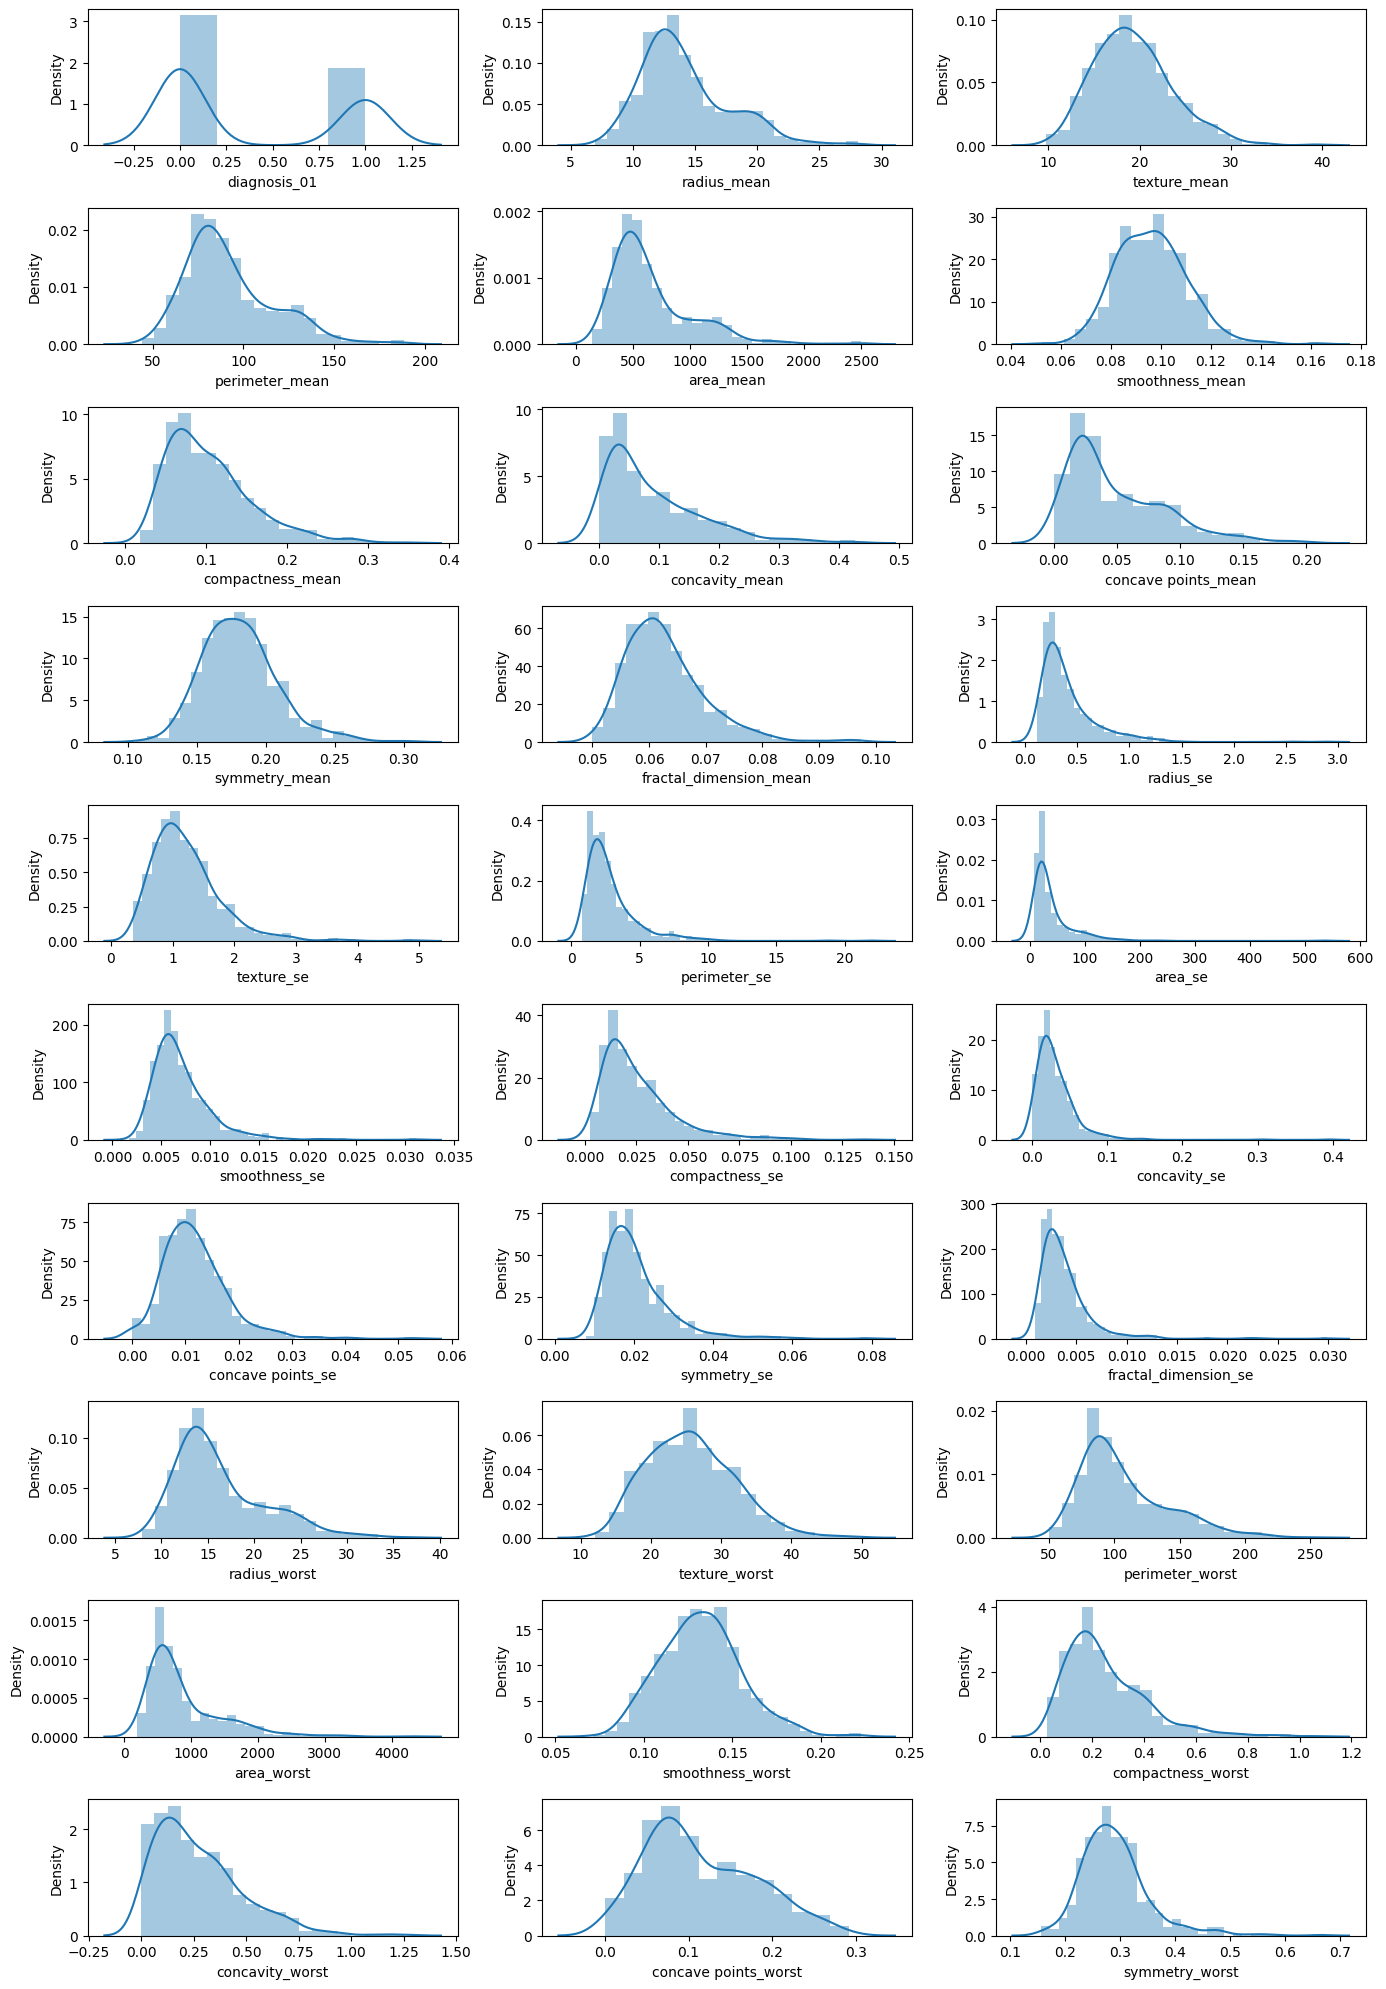

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize = (14, 20))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(10, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

warnings.filterwarnings('default')

## Correlation Analysis

"Feature diversity is important in model training. However, as you can see in the heatmap, there are columns that are highly correlated with many features other than the target variable. We can remove these features."

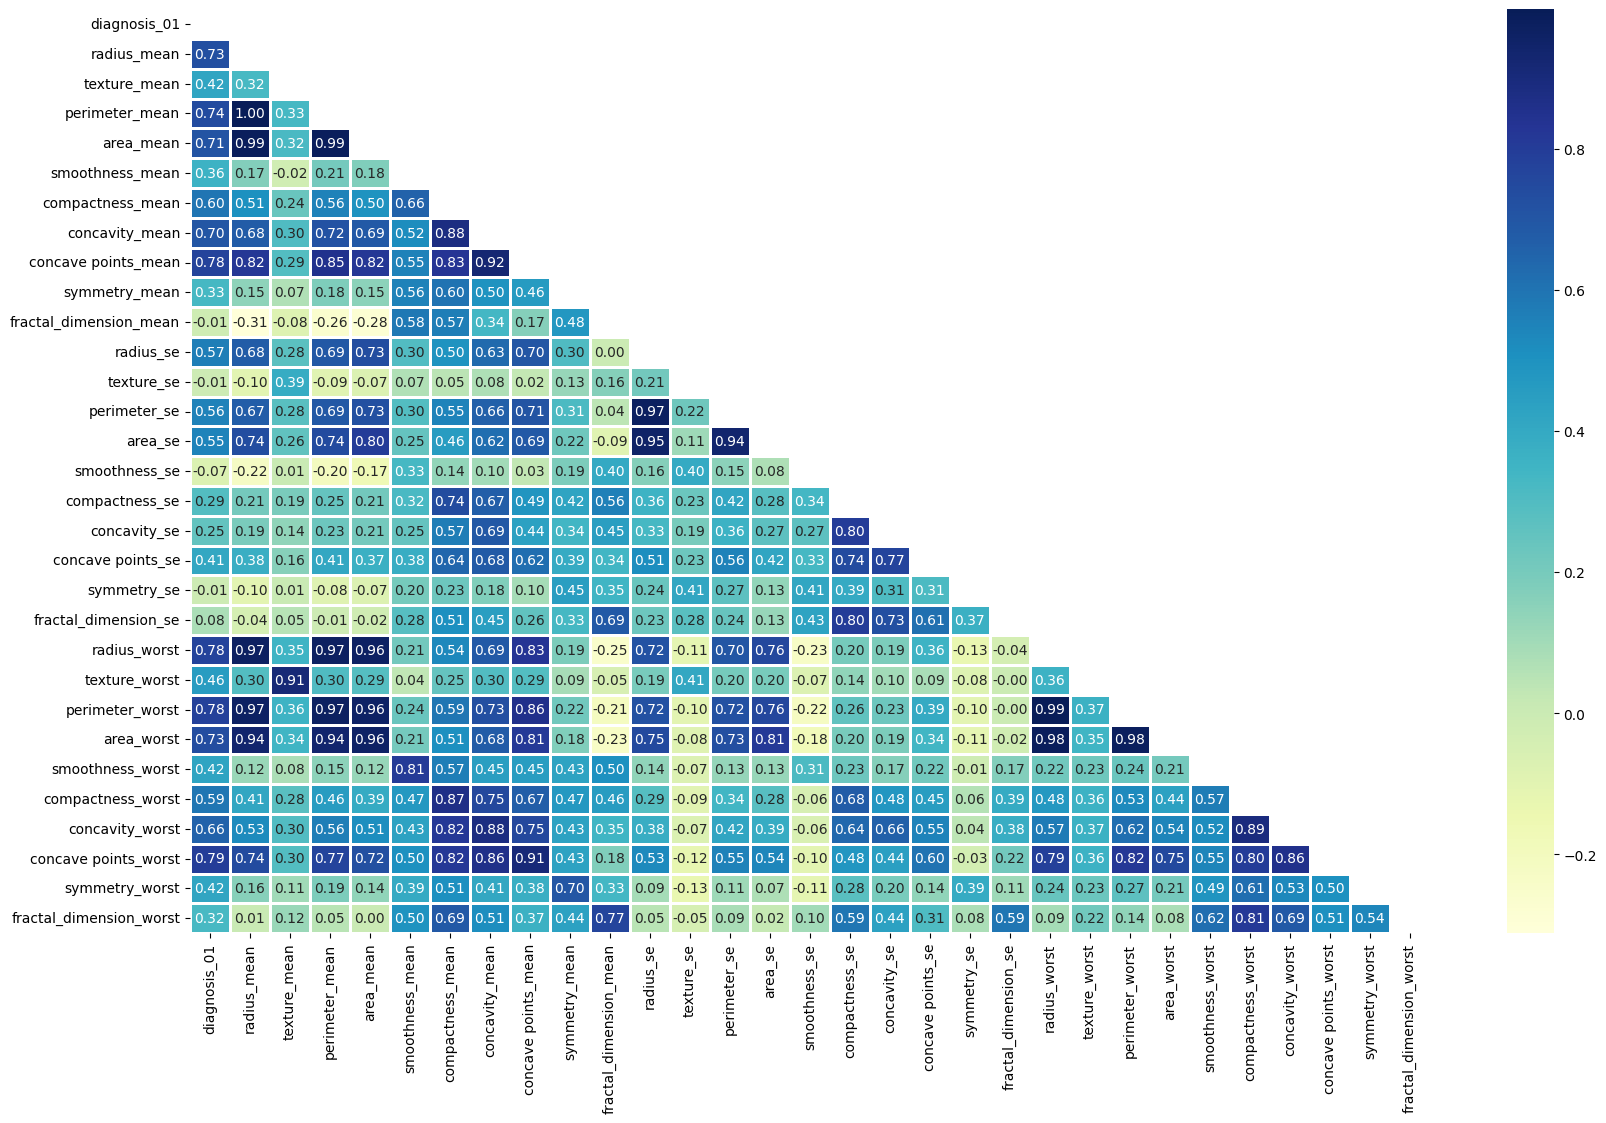

In [9]:
# Let's check the correlation between the variables 
import numpy as np

plt.figure(figsize = (20, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f", cmap='YlGnBu')
plt.show()

In [10]:
# features with higher than threshold(0.96) correlation
corr_matrix = df.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

high_corr = [x for x in tri_df.columns if any(tri_df[x] > 0.96)]
high_corr

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'radius_se',
 'radius_worst',
 'perimeter_worst']

In [11]:
# I selected 4 features by comparing the output of high_corr with the corr graph
df = df.drop(["perimeter_mean","area_mean","radius_mean","radius_worst"], axis = 1)

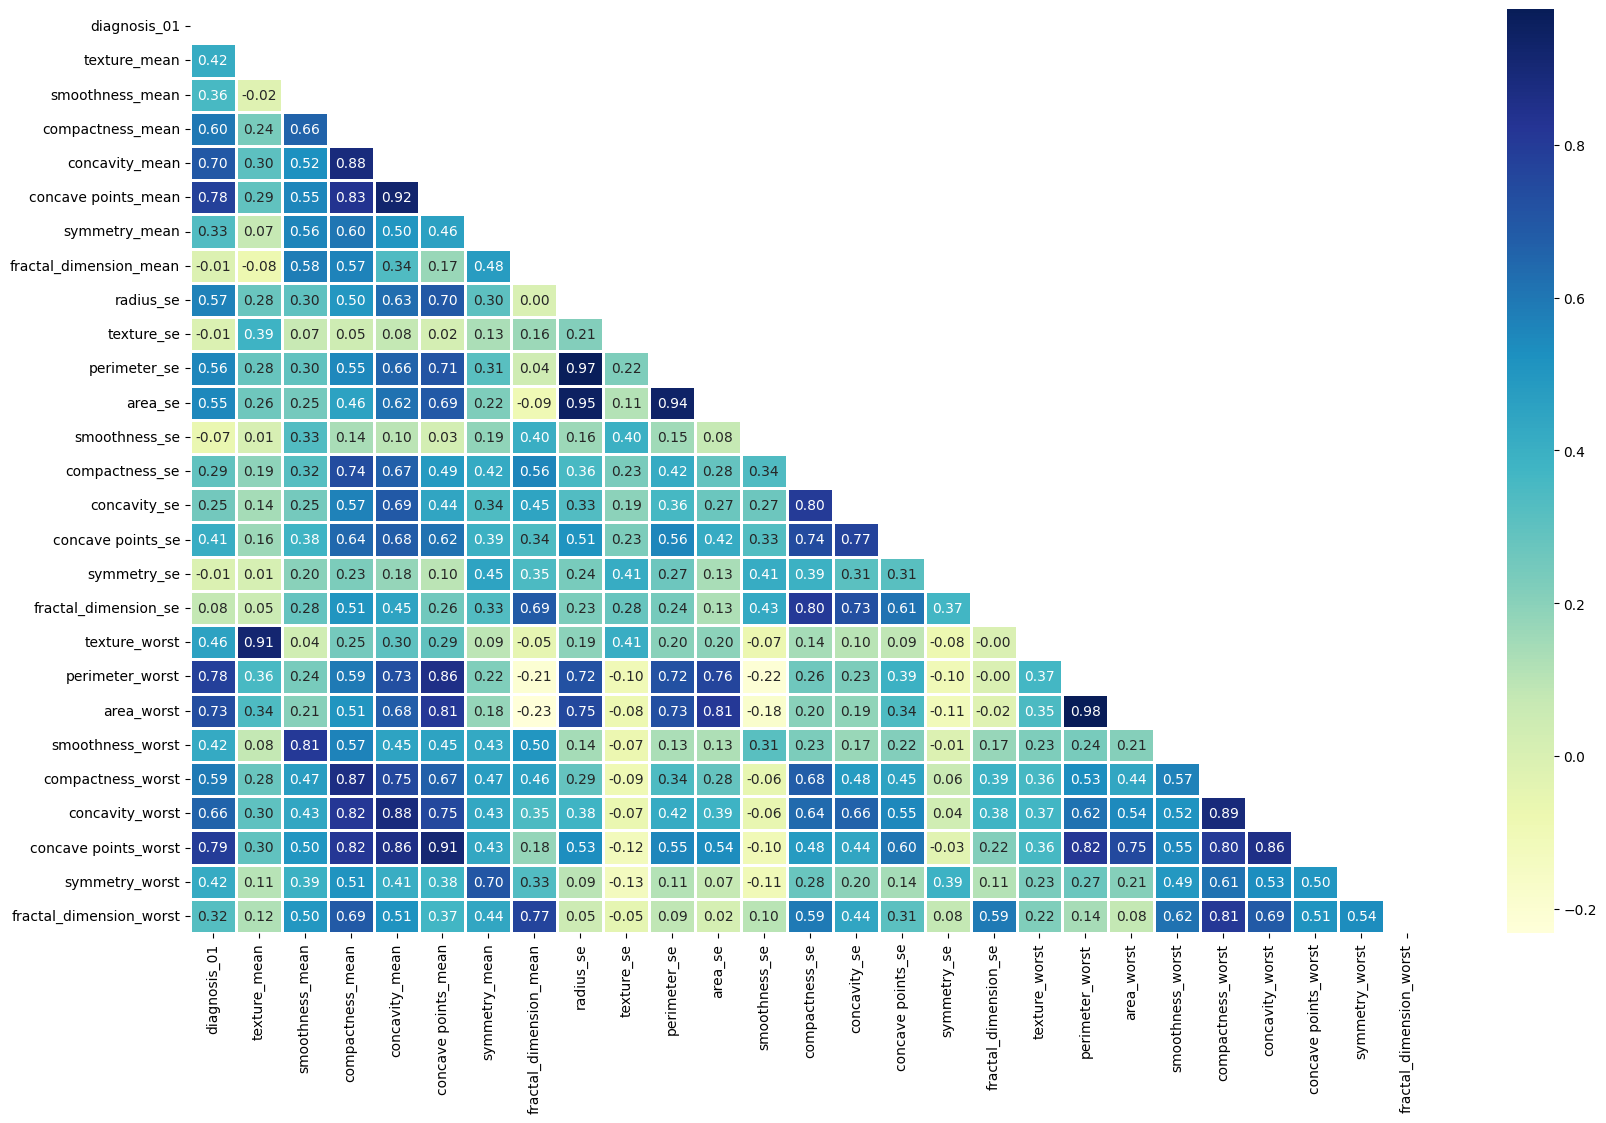

In [12]:
# correlation after drop
plt.figure(figsize = (20, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f", cmap='YlGnBu')
plt.show()

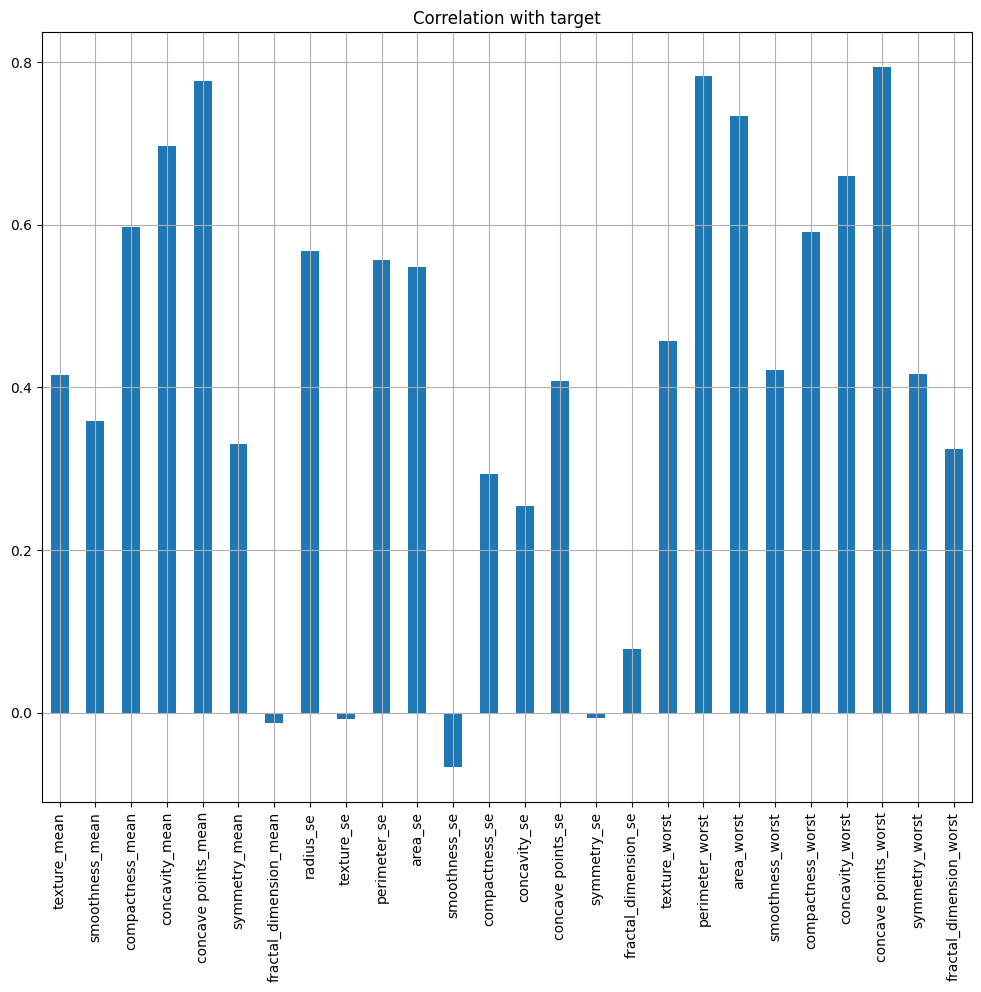

In [13]:
# Correlation with target
df.drop('diagnosis_01', axis=1).corrwith(df.diagnosis_01).plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation with target");

## Outlier-1 (boxplot method)

Drop outliers

In [14]:
# scalar process to observe outliers in a single graph
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler

StandardScaler()

In [15]:
scaled_array = scaler.fit_transform(df.iloc[:,1:])
scaled_array

array([[-2.07333501,  1.56846633,  3.28351467, ...,  2.29607613,
         2.75062224,  1.93701461],
       [-0.35363241, -0.82696245, -0.48707167, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 0.45618695,  0.94221044,  1.05292554, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 2.0455738 , -0.84048388, -0.03867967, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 2.33645719,  1.52576706,  3.27214378, ...,  2.28998549,
         1.91908301,  2.21963528],
       [ 1.22179204, -3.11208479, -1.15075248, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [16]:
df1 = pd.DataFrame(scaled_array, columns = df.iloc[:,1:].columns)

In [17]:
df1 = pd.concat([df1, df.loc[:, "diagnosis_01"]], axis = 1)
df1.head(3)

,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_01
0,-2.073335,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,-0.353632,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,0.456187,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1


In [18]:
from collections import Counter 

def detect_outliers(df,features):             
    outlier_indices = []                      
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)       
                                                                                
            
    outlier_indices = Counter(outlier_indices)         
    # adds to the list if there are more than 9 outliers in the sample                                                   
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 9)   
                                                                               
    return multiple_outliers

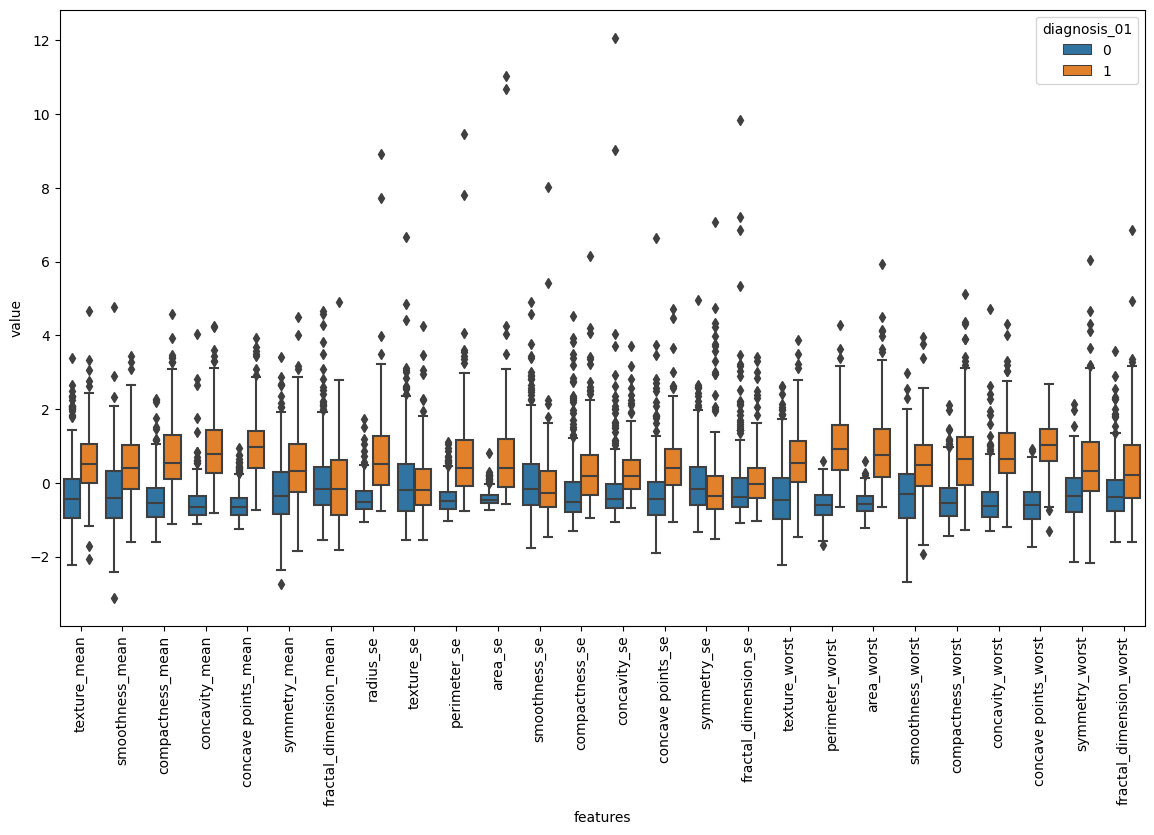

In [19]:
# distribution before removing outliers
warnings.filterwarnings('ignore')
data_melted = pd.melt(df1, id_vars = "diagnosis_01", var_name = "features", value_name = "value")

plt.figure(figsize = (14,8))
sns.boxplot(x = "features", y = "value", hue = "diagnosis_01", data = data_melted)
plt.xticks(rotation = 90)
plt.show()
warnings.filterwarnings('default')

In [20]:
# detect outliers

# all column names that aren't the diagnosis
not_diagnosis_cols = [colname for colname in df1.columns if colname != 'diagnosis_01']
df1.loc[detect_outliers(df1, not_diagnosis_cols)]

,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_01
3,0.253732,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
122,0.211845,3.440117,3.455973,4.243589,3.927930,3.079138,0.846648,3.983947,3.452962,3.435978,...,-0.274754,2.193393,2.096165,1.632072,1.082296,1.478172,1.677876,0.519703,-0.213673,1
12,1.282296,0.073992,2.680858,1.477729,1.621948,2.137194,2.155097,1.986249,4.265788,4.061202,...,0.694167,1.323647,0.793551,-1.256713,0.865372,0.439988,0.945477,0.445285,1.017112,1
78,1.089149,2.294354,4.568425,3.598263,2.875535,3.995524,2.639918,1.900350,1.212248,2.862733,...,0.984029,1.877663,1.305104,1.382207,2.303684,2.379147,2.073768,4.107940,0.869706,1
108,0.088510,2.579016,3.268353,4.238567,3.440423,2.717694,1.076300,2.922839,0.595371,3.556271,...,0.379878,2.964846,2.600686,1.653990,2.833589,3.303630,2.685877,1.867314,0.772728,1
152,-0.919110,0.771413,1.052926,4.042709,0.764814,2.688487,4.275833,1.513443,2.625622,0.597473,...,-1.007551,-1.078879,-0.879102,-0.138898,0.145898,2.635815,0.647036,0.335276,2.324925,0


In [21]:
# drop outliers
df1 = df1.drop(detect_outliers(df1, not_diagnosis_cols),axis = 0).reset_index(drop = True)
df1.shape

(563, 27)

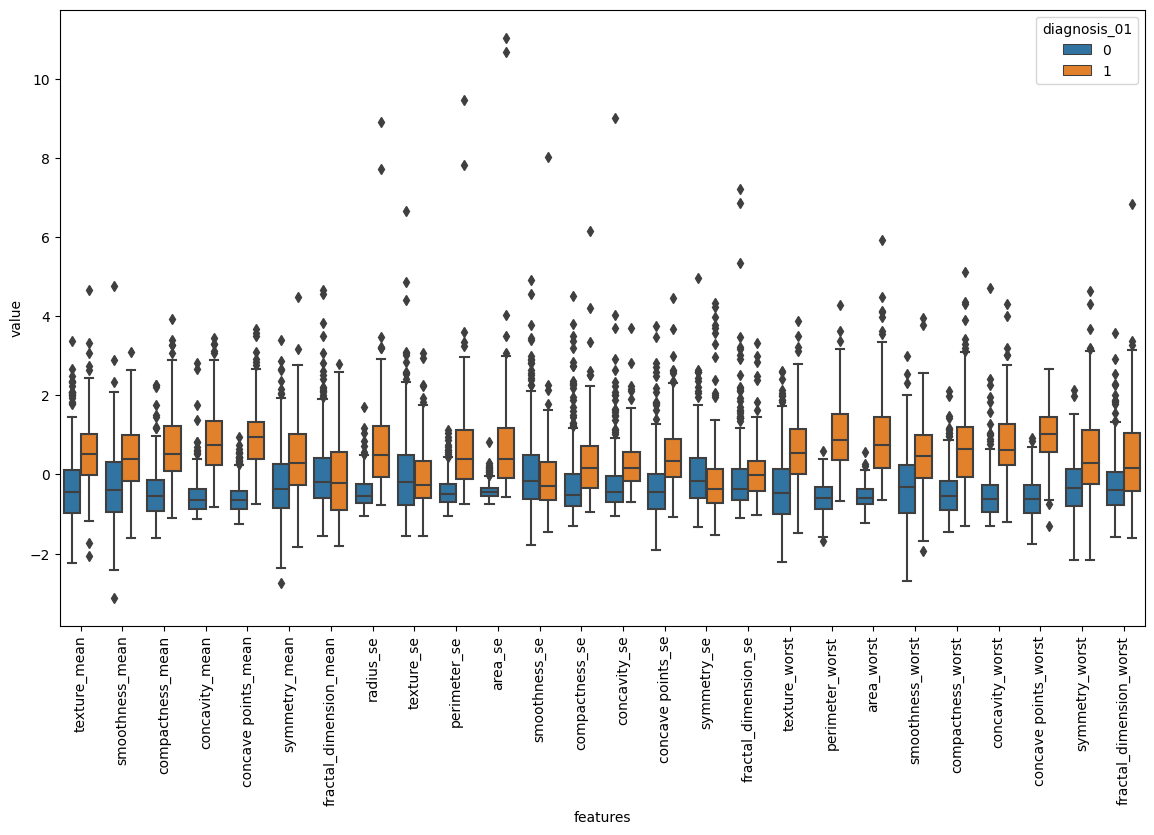

In [22]:
data_melted = pd.melt(df1, id_vars = "diagnosis_01", var_name = "features", value_name = "value")

plt.figure(figsize = (14,8))
sns.boxplot(x = "features", y = "value", hue = "diagnosis_01", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

# Upload `df1` as a new version

Upload as a new version of the dataset ready for training the models

Source: https://learn.microsoft.com/en-us/azure/machine-learning/tutorial-explore-data?view=azureml-api-2#create-a-new-version-of-the-data-asset

In [23]:
# save df1 to file system
import os

os.makedirs('./data', exist_ok=True)
df1.to_parquet("./data/cleaned-wisconsin-bca.parquet")


In [24]:
from azure.ai.ml.entities import Data
from azure.ai.ml.constants import AssetTypes

my_path = "./data/cleaned-wisconsin-bca.parquet"

# Define the data asset, and use tags to make it clear the asset can be used in training

my_data = Data(
    name="wisconsin-bca",
    version='2-boxplot',
    description="Wisconsin Breast Cancer Analysis",
    tags={"training_data": "true", "format": "parquet", "outlier-type": "boxplot"},
    path=my_path,
    type=AssetTypes.URI_FILE,
)


## create the data asset

# my_data = ml_client.data.create_or_update(my_data)

# print(f"Data asset created. Name: {my_data.name}, version: {my_data.version}")


## Outlier-2 (LOF Method)

In [25]:
y = df.diagnosis_01
X = df.drop(["diagnosis_01"],axis = 1)
columns = X.columns.tolist()

In [26]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor()
y_pred = clf.fit_predict(X)
X_score = clf.negative_outlier_factor_

In [27]:
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

In [28]:
threshold = -2
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()
outlier_index

[38, 101, 180, 265, 352, 368, 461]

In [29]:
X = X.drop(outlier_index)
y = y.drop(outlier_index).values

In [30]:
# combine X and y back into a dataframe
dfY = df.diagnosis_01.drop(outlier_index)
df2 = pd.merge(X, dfY, left_index=True, right_index=True)

## Upload df2 as a new version

In [31]:
# save df2 to file system
import os

os.makedirs('./data', exist_ok=True)
df2.to_parquet("./data/cleaned-wisconsin-bca-lof.parquet")

In [32]:
from azure.ai.ml.entities import Data
from azure.ai.ml.constants import AssetTypes

my_path = "./data/cleaned-wisconsin-bca-lof.parquet"

# Define the data asset, and use tags to make it clear the asset can be used in training

my_data = Data(
    name="wisconsin-bca",
    version='2-boxplot',
    description="Wisconsin Breast Cancer Analysis",
    tags={"training_data": "true", "format": "parquet", "outlier-type": "log"},
    path=my_path,
    type=AssetTypes.URI_FILE,
)


## create the data asset

# my_data = ml_client.data.create_or_update(my_data)

# print(f"Data asset created. Name: {my_data.name}, version: {my_data.version}")

In [34]:
df2[0]